<a href="https://colab.research.google.com/github/DanilinaSveta/neiro_lab1/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
x = np.random.rand(100000)
print(x)

[0.14817202 0.62905345 0.83188273 ... 0.6296874  0.87644193 0.50077233]


In [3]:
sin_x = np.sin(x)
print(sin_x)

[0.14763043 0.58837966 0.73920067 ... 0.58889214 0.76846698 0.48010317]


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, sin_x,
                                                    train_size=0.33,
                                                    random_state=42)

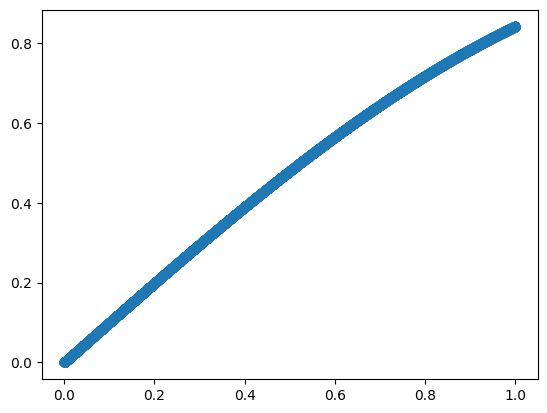

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test);

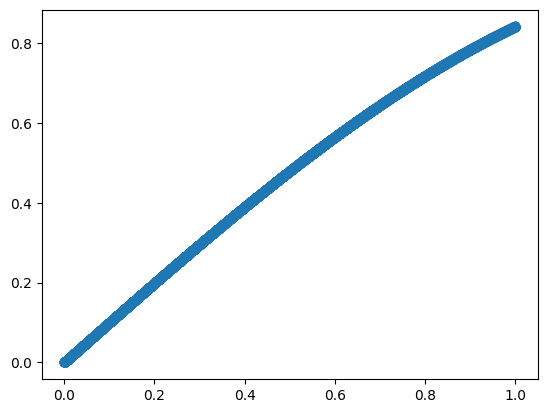

In [7]:
plt.scatter(X_train, y_train)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.8))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 15, batch_size=10, validation_split = 0.2, verbose=2)

Epoch 1/15
3300/3300 - 12s - loss: 0.0173 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00 - 12s/epoch - 4ms/step
Epoch 2/15
3300/3300 - 12s - loss: 0.0143 - accuracy: 0.0000e+00 - val_loss: 0.0126 - val_accuracy: 0.0000e+00 - 12s/epoch - 3ms/step
Epoch 3/15
3300/3300 - 12s - loss: 0.0131 - accuracy: 0.0000e+00 - val_loss: 0.0154 - val_accuracy: 0.0000e+00 - 12s/epoch - 4ms/step
Epoch 4/15
3300/3300 - 12s - loss: 0.0122 - accuracy: 0.0000e+00 - val_loss: 0.0245 - val_accuracy: 0.0000e+00 - 12s/epoch - 4ms/step
Epoch 5/15
3300/3300 - 11s - loss: 0.0120 - accuracy: 0.0000e+00 - val_loss: 0.0313 - val_accuracy: 0.0000e+00 - 11s/epoch - 3ms/step
Epoch 6/15
3300/3300 - 11s - loss: 0.0118 - accuracy: 0.0000e+00 - val_loss: 0.0403 - val_accuracy: 0.0000e+00 - 11s/epoch - 3ms/step
Epoch 7/15
3300/3300 - 11s - loss: 0.0117 - accuracy: 0.0000e+00 - val_loss: 0.0384 - val_accuracy: 0.0000e+00 - 11s/epoch - 3ms/step
Epoch 8/15
3300/3300 - 11s - loss: 0.0115 - accuracy: 0.0000e+

In [22]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 12, "activation": "tanh", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {

In [21]:
import json
import pprint
pprint.pprint(json.loads(json_string))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'InputLayer',
                        'config': {'batch_input_shape': [None, 1],
                                   'dtype': 'float32',
                                   'name': 'dense_input',
                                   'ragged': False,
                                   'sparse': False},
                        'module': 'keras.layers',
                        'registered_name': None},
                       {'build_config': {'input_shape': [None, 1]},
                        'class_name': 'Dense',
                        'config': {'activation': 'tanh',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 1],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config':

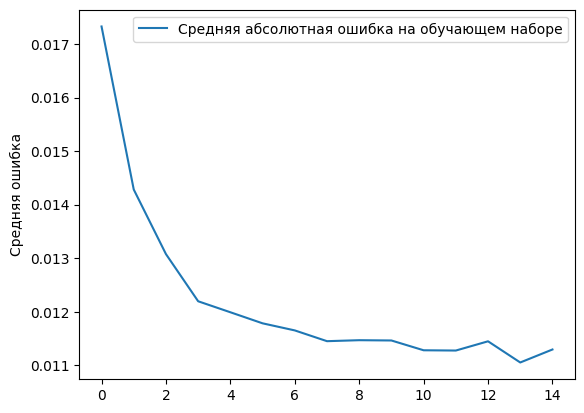

In [23]:
plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [24]:
predictions = model.predict(X_test)
predictions

2094/2094 [==============================] - 2s 1ms/step


array([[0.3825438 ],
       [0.40077463],
       [0.3592709 ],
       ...,
       [0.43746033],
       [0.47723365],
       [0.3524434 ]], dtype=float32)

In [25]:
print("Предсказание: ", predictions[10], ", истина:", y_test[10])

Предсказание:  [0.38895664] , истина: 0.31817120890823863


In [26]:
for i in np.arange(0, len(y_test)):
  loss = np.abs(predictions[i][0] - y_test[i])

In [ ]:
#for i in np.arange(0, len(y_test)):
#    print("Предсказанное значение:", predictions[i][0], ", правильное значение:", y_test[i], 'разница: ', np.abs(predictions[i][0] - y_test[i]))

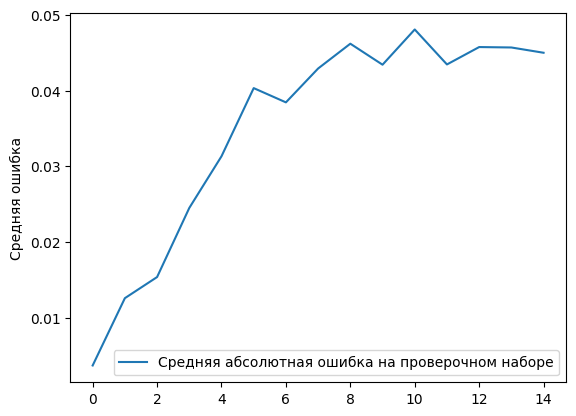

In [27]:
plt.plot(history.history['val_loss'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()